In [1]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
# Generate testing data set
X,_= make_blobs(n_samples=300, random_state=42)
X

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

In [3]:
df=pd.DataFrame(X)
df.columns=["col 1","col 2"];
df

,col 1,col 2
0,-7.338988,-7.729954
1,-7.740041,-7.264665
2,-1.686653,7.793442
3,4.422198,3.071947
4,-8.917752,-7.888196
...,...,...
295,-3.660191,9.389984
296,3.810884,1.412989
297,-4.116681,9.198920
298,-6.861209,-5.203672


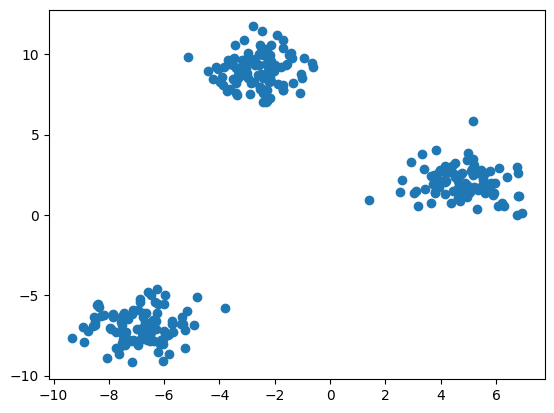

In [4]:
plt.scatter(df["col 1"],df["col 2"])
plt.show()

In [5]:
# calling birch algorithm
# threhold decide wheater the cluster will be merge or not
# n_clusters=number of cluster we want
# branching_factor: will decide how many sub cluster can be form at each node
birch = Birch(threshold=0.5, n_clusters=3, branching_factor=50)


In [6]:
# Fit the model to the data
birch.fit(X)

Birch()

In [7]:
# Retrieve cluster 
cluster_labels = birch.labels_
cluster_labels


array([0, 0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 2,
       1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0,
       1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 1, 0,
       2, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2,
       1, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0], d

In [8]:
# adding clusters to df
df["cluster"]=cluster_labels
df

,col 1,col 2,cluster
0,-7.338988,-7.729954,0
1,-7.740041,-7.264665,0
2,-1.686653,7.793442,2
3,4.422198,3.071947,1
4,-8.917752,-7.888196,0
...,...,...,...
295,-3.660191,9.389984,2
296,3.810884,1.412989,1
297,-4.116681,9.198920,2
298,-6.861209,-5.203672,0


In [9]:
# Retrieve cluster centers
cluster_centers = birch.subcluster_centers_
cluster_centers

array([[-7.15694559, -7.59654758],
       [-2.36299186,  7.52812574],
       [ 4.89352685,  3.20870851],
       [-9.13451171, -7.78260038],
       [ 5.04908578,  1.49176384],
       [-2.63145184,  8.78055239],
       [-3.39210115,  9.49093159],
       [-3.26976305, 10.71539242],
       [-3.76164578,  8.54940504],
       [-8.44056549, -6.82133419],
       [ 2.94725237,  1.62168748],
       [-2.37691761, 10.14324021],
       [-2.3817208 , 11.47224176],
       [-1.46428088,  8.05791731],
       [-6.57507892, -5.58273071],
       [-7.56050119, -6.32875432],
       [ 3.57065189,  3.9350927 ],
       [-6.25328279, -7.72058972],
       [-8.38892435, -5.61734122],
       [ 3.96172133,  1.84327761],
       [ 6.46135751,  0.38853528],
       [-6.31892623, -6.67689179],
       [ 5.15492652,  5.82590117],
       [-1.8024978 ,  9.47268243],
       [ 5.90501245,  1.9202982 ],
       [-3.80074638, -5.76053468],
       [-0.80999212,  9.31180342],
       [-7.7246391 , -8.42625274],
       [ 6.81137153,

In [10]:
center=pd.DataFrame(cluster_centers)
center.columns=["col 1","col 2"]
center

,col 1,col 2
0,-7.156946,-7.596548
1,-2.362992,7.528126
2,4.893527,3.208709
3,-9.134512,-7.782600
4,5.049086,1.491764
5,-2.631452,8.780552
6,-3.392101,9.490932
7,-3.269763,10.715392
8,-3.761646,8.549405
9,-8.440565,-6.821334


In [11]:
# dividing clusters:
c1=df[df['cluster']==0]
c2=df[df['cluster']==1]
c3=df[df['cluster']==2]

print(c1.shape)
print(c2.shape)
print(c3.shape)

(100, 3)
(100, 3)
(100, 3)


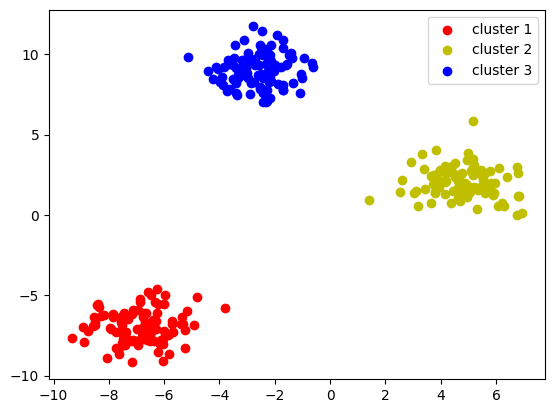

In [12]:
plt.scatter(c1["col 1"],c1["col 2"],label="cluster 1",c="r")
plt.scatter(c2["col 1"],c2["col 2"],label="cluster 2",c="y")
plt.scatter(c3["col 1"],c3["col 2"],label="cluster 3",c="b")
plt.legend()
plt.show()

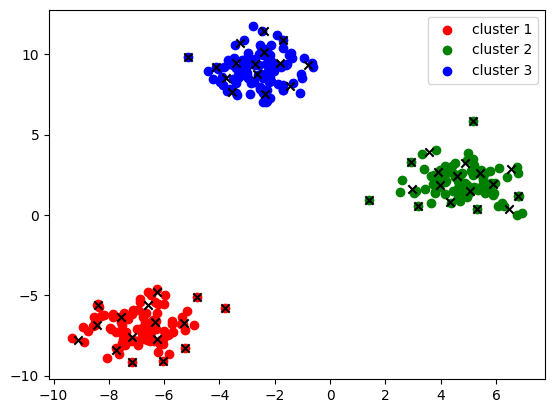

In [13]:
plt.scatter(c1["col 1"],c1["col 2"],label="cluster 1",c="r")
plt.scatter(c2["col 1"],c2["col 2"],label="cluster 2",c="g")
plt.scatter(c3["col 1"],c3["col 2"],label="cluster 3",c="b")
plt.scatter(center['col 1'],center["col 2"],marker="x",c="black")
plt.legend()
plt.show()

In [14]:
# new data :
data=[2.4324,4.56565]

In [15]:
# finding the place
birch.predict([data])

array([1], dtype=int64)

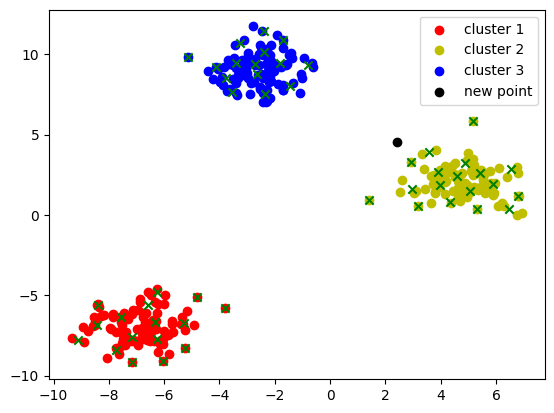

In [16]:
plt.scatter(c1["col 1"],c1["col 2"],label="cluster 1",c="r")
plt.scatter(c2["col 1"],c2["col 2"],label="cluster 2",c="y")
plt.scatter(c3["col 1"],c3["col 2"],label="cluster 3",c="b")
plt.scatter(center['col 1'],center["col 2"],marker="x",c="green")
plt.scatter(data[0],data[1],c="black",label="new point")
plt.legend()
plt.show()